In [1]:
print('Importing libraries')
import sys
import pandas as pd
import spacy
import numpy as np
import pandas as pd
import gensim
from gensim.models.phrases import Phrases, Phraser

import wordcloud as wc
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

spacy.cli.download("en_core_web_md")
nlp = spacy.load('en_core_web_md')

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [2]:
print_preprocessed_collection = False

In [3]:
print("Load 5000 rows of the dataset...")
df = pd.read_csv('./data/dataset.csv', nrows=5000)
df

Load 5000 rows of the dataset...


,article_id,sectionName,webTitle,webUrl,bodyContent,webPublicationDate,id
0,us-news/2016/jan/31/iowa-caucus-underdog-candi...,US news,Iowa underdogs put on brave faces despite all ...,https://www.theguardian.com/us-news/2016/jan/3...,As polling day looms and the cameras turn only...,2016-01-31T23:53:37Z,1
1,us-news/2016/jan/31/iowa-caucus-worlds-most-pa...,US news,Iowa caucus: hologram eagle and Jesus star on ...,https://www.theguardian.com/us-news/2016/jan/3...,"In Des Moines on Sunday, the Guardian was give...",2016-01-31T23:46:28Z,2
2,world/2016/jan/31/tanzania-britsh-helicopter-p...,World news,British pilot in Tanzania 'manoeuvred ​to save...,https://www.theguardian.com/world/2016/jan/31/...,A British pilot who was shot dead by an elepha...,2016-01-31T23:43:48Z,3
3,football/2016/jan/31/late-winner-gets-usa-off-...,Football,USA 3-2 Iceland | International friendly match...,https://www.theguardian.com/football/2016/jan/...,USA took a step toward shaking off the ghosts ...,2016-01-31T23:30:49Z,4
4,football/2016/jan/31/blackburn-paul-lambert-ox...,Football,Reinvigorated Paul Lambert reflects after impr...,https://www.theguardian.com/football/2016/jan/...,"The clean-shaven, spectacle free and suspiciou...",2016-01-31T22:30:10Z,5
...,...,...,...,...,...,...,...
4995,commentisfree/2016/mar/28/ban-legal-highs-peop...,Opinion,'People will use harder drugs': legal high use...,https://www.theguardian.com/commentisfree/2016...,"The ban on legal highs, which will come into l...",2016-03-28T10:06:23Z,4996
4996,football/2016/mar/28/euro-2016-england-france-...,Football,"Euro 2016: how England, France, Spain, Germany...",https://www.theguardian.com/football/2016/mar/...,The international break has thrown up some int...,2016-03-28T10:02:55Z,4997
4997,lifeandstyle/2016/mar/28/all-in-the-mind-menta...,Life and style,All in the mind: the trouble with mental health,https://www.theguardian.com/lifeandstyle/2016/...,Breakfast might not seem to be the time to dis...,2016-03-28T10:00:23Z,4998
4998,environment/climate-consensus-97-per-cent/2016...,Environment,New survey finds a growing climate consensus a...,https://www.theguardian.com/environment/climat...,There have been multiple scientific studies th...,2016-03-28T10:00:23Z,4999


In [4]:
print("Create the collection using the 'webTitle' and 'bodyContent' columns")

collection = df.webTitle + df.bodyContent
collection

Create the collection using the 'webTitle' and 'bodyContent' columns


0       Iowa underdogs put on brave faces despite all ...
1       Iowa caucus: hologram eagle and Jesus star on ...
2       British pilot in Tanzania 'manoeuvred ​to save...
3       USA 3-2 Iceland | International friendly match...
4       Reinvigorated Paul Lambert reflects after impr...
                              ...                        
4995    'People will use harder drugs': legal high use...
4996    Euro 2016: how England, France, Spain, Germany...
4997    All in the mind: the trouble with mental healt...
4998    New survey finds a growing climate consensus a...
4999    Van Hoogstraten’s palace is a monstrosity – bu...
Length: 5000, dtype: object

# Preprocessing

In [5]:
print('NaN values in collection:',collection.isnull().sum())
print('Remove NaN values...')
collection.dropna(inplace=True)

NaN values in collection: 31
Remove NaN values...


In [6]:
print('Lemmatization...')
lematized_collection = []

for i,d in enumerate(collection):
  print(f'{i} of {len(collection)}',end='')
  tdoc=nlp(d)
  lm = ' '.join([token.lemma_ for token in tdoc  if not(
      token.is_stop == True or 
      token.is_digit == True or 
      token.is_punct == True or 
      token.like_url == True or 
      token.like_email == True or
      token.like_num == True or
      token.is_currency == True or
      token.pos_ == 'VERB' or
      token.lemma_.startswith('@') or
      len(token.lemma_) < 3
  )])
  lematized_collection.append(lm)
  print('\r\r\r\r\r\r\r\r',end='')

print('\r\r\r\r\r\r\r\r',end='')
print('Collection lematized')

Lemmatization...
Collection lematized


In [7]:
print('Original first document:\n')
print(collection[0])
print('\n\nLemmatized first document:\n')
print(lematized_collection[0])

Original first document:

Iowa underdogs put on brave faces despite all but inevitable defeatsAs polling day looms and the cameras turn only toward the contenders to win the Iowa caucuses, at least some around nation can’t help but wonder: what happened to the other guys?
On the final weekend before the Iowa caucuses, the presidential candidates straggling behind the leaders – Donald Trump, Ted Cruz and Marco Rubio for the Republicans, Hillary Clinton and Bernie Sanders for the Democrats – carried on with brave faces, despite sinking poll numbers and ambivalent voters. Underdog candidates could, however, have an outsize effect on the campaign: their supporters represent the spread between the leaders. Sway voters who prefer a third- (or fourth- or fifth-) tier contender could bring another candidate closer to the nomination. For example supporters of the third Democratic candidate, Martin O’Malley, polling at 3% in Iowa could ultimately sway the race on Monday. According to caucus rule

In [8]:
print('Tokenizing...', end='')

tokenized_collection = [gensim.utils.simple_preprocess(doc, deacc= True, min_len=3) for doc in lematized_collection] 

print('\r\r\r\r\r\r\r\r',end='')
print('Collection tokenized')

Collection tokenized


In [9]:
print('Building bigrams...')

phrases  = Phrases(tokenized_collection, min_count = 2,threshold=9)
bigram = Phraser(phrases)
preprocessed_collection = [bigram[d] for d in tokenized_collection]

print('Bigrams built')

Building bigrams...
Bigrams built


# Statistics

In [10]:
def calculateStatistics(collection):
  ndocs = len(collection)

  collection_size = 0

  shortest_doc_index = 0
  largest_doc_index = 0

  for i, d in enumerate(collection):
    collection_size += len(d)

    # shortest_doc
    if (len(d) < len(collection[shortest_doc_index])):
      shortest_doc_index = i

    #largest_doc
    if (len(d) > len(collection[largest_doc_index])):
      largest_doc_index = i

  print("Number of documents: ", ndocs)
  print(f"Shortest doc index: { shortest_doc_index }, size: { len(collection[shortest_doc_index]) }")
  print(f"Largest doc index: { largest_doc_index }, size: { len(collection[largest_doc_index]) }")
  print("Average size: ", collection_size/len(collection))

calculateStatistics(preprocessed_collection)

Number of documents:  4969
Shortest doc index: 2158, size: 2
Largest doc index: 4165, size: 2223
Average size:  248.4793721070638


In [11]:
threshold = 50

print(f'Removing documents with size smaller than {threshold}...')

ncol = []
for doc in preprocessed_collection:
  if len(doc) >= threshold:
    ncol.append(doc)

print('Recalculating statistics...\n')

calculateStatistics(ncol)

preprocessed_collection = ncol

Removing documents with size smaller than 50...
Recalculating statistics...

Number of documents:  4879
Shortest doc index: 3053, size: 50
Largest doc index: 4094, size: 2223
Average size:  252.46361959417914


In [12]:
if print_preprocessed_collection:
    for doc in preprocessed_collection:
        print(doc,'\n')

In [13]:
print('Original first document:\n')
print(collection[0])
print('\n\nPreprocessed first document:\n')
print(preprocessed_collection[0])

Original first document:

Iowa underdogs put on brave faces despite all but inevitable defeatsAs polling day looms and the cameras turn only toward the contenders to win the Iowa caucuses, at least some around nation can’t help but wonder: what happened to the other guys?
On the final weekend before the Iowa caucuses, the presidential candidates straggling behind the leaders – Donald Trump, Ted Cruz and Marco Rubio for the Republicans, Hillary Clinton and Bernie Sanders for the Democrats – carried on with brave faces, despite sinking poll numbers and ambivalent voters. Underdog candidates could, however, have an outsize effect on the campaign: their supporters represent the spread between the leaders. Sway voters who prefer a third- (or fourth- or fifth-) tier contender could bring another candidate closer to the nomination. For example supporters of the third Democratic candidate, Martin O’Malley, polling at 3% in Iowa could ultimately sway the race on Monday. According to caucus rule

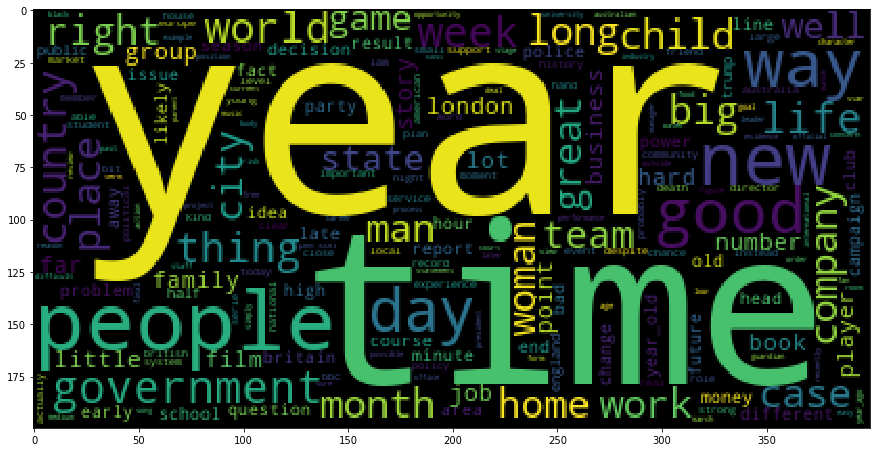

In [14]:
figure(figsize=(15, 20))

allw = []
for d in preprocessed_collection:
  allw += d
allw = ' '.join(w for w in allw)

mycloud = wc.WordCloud().generate(allw)
plt.imshow(mycloud)